In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
#pip install fuzzywuzzy
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#load the Excel file
path = 'C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting.csv'
#path = 'C:/Users/adi41/Desktop/ML2 PROJECT/Crash_Reporting_v1_modified.csv'
df = pd.read_csv(path, encoding='latin1')
print("Number of columns:", df.shape[1])


#delete line 0 in the data
df = df.drop(0)
#print(df.head())


Number of columns: 38


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## מחיקת עמודות לא רלוונטיות ועמודות עם כפילויות

In [3]:
df.drop(columns=["Vehicle Second Impact Location","Vehicle First Impact Location",'Report Number'], inplace=True)
df.drop(columns=['Local Case Number','Person ID','Location','Cross-Street Name','Vehicle Model','Vehicle Make'], inplace=True)
df.drop(columns=[ "Vehicle Going Dir","Vehicle Continuing Dir","Vehicle Movement","Vehicle Body Type"], inplace=True)

## פונקציה שמקבלת עמודה ומחזירה את המילים היחודיות שבה  

In [4]:
def get_unique_words_in_column(df, column_name):
    unique_words = set()
    column_values = df[column_name].dropna().astype(str).tolist()
    for value in column_values:
        unique_words.update(value.split())
    return unique_words

#print("Unique words in", column_name, "column:")
#print(unique_words)

# טיפול בחריגים     

### Vehicle Year

#### נשאיר בעמודה רק את הרכבים שיוצרו בשנים 1980-2023

In [5]:
get_unique_words_in_column(df, "Vehicle Year")

{'0.0',
 '1.0',
 '1005.0',
 '1008.0',
 '1012.0',
 '1014.0',
 '1015.0',
 '1025.0',
 '1111.0',
 '1140.0',
 '1234.0',
 '13.0',
 '14.0',
 '15.0',
 '1900.0',
 '1901.0',
 '1911.0',
 '1930.0',
 '1946.0',
 '1947.0',
 '1949.0',
 '1955.0',
 '1959.0',
 '1960.0',
 '1961.0',
 '1963.0',
 '1965.0',
 '1966.0',
 '1967.0',
 '1968.0',
 '1969.0',
 '1970.0',
 '1971.0',
 '1972.0',
 '1974.0',
 '1975.0',
 '1976.0',
 '1977.0',
 '1978.0',
 '1979.0',
 '198.0',
 '1980.0',
 '1981.0',
 '1982.0',
 '1983.0',
 '1984.0',
 '1985.0',
 '1986.0',
 '1987.0',
 '1988.0',
 '1989.0',
 '1990.0',
 '1991.0',
 '1992.0',
 '1993.0',
 '1994.0',
 '1995.0',
 '1996.0',
 '1997.0',
 '1998.0',
 '1999.0',
 '2.0',
 '200.0',
 '2000.0',
 '2001.0',
 '2002.0',
 '2003.0',
 '2004.0',
 '2005.0',
 '2006.0',
 '2007.0',
 '2008.0',
 '2009.0',
 '201.0',
 '2010.0',
 '2011.0',
 '2012.0',
 '2013.0',
 '2014.0',
 '2015.0',
 '2016.0',
 '2017.0',
 '2018.0',
 '2019.0',
 '202.0',
 '2020.0',
 '2021.0',
 '2022.0',
 '2023.0',
 '2024.0',
 '2033.0',
 '2040.0',
 '2041.

In [6]:
# Define the range of valid years
start_year = 1980
end_year = 2023

# Replace values outside the range with "Unknown"
df.loc[~df['Vehicle Year'].between(start_year, end_year), 'Vehicle Year'] = 'Unknown'


In [7]:
get_unique_words_in_column(df, "Vehicle Year")

{'1980.0',
 '1981.0',
 '1982.0',
 '1983.0',
 '1984.0',
 '1985.0',
 '1986.0',
 '1987.0',
 '1988.0',
 '1989.0',
 '1990.0',
 '1991.0',
 '1992.0',
 '1993.0',
 '1994.0',
 '1995.0',
 '1996.0',
 '1997.0',
 '1998.0',
 '1999.0',
 '2000.0',
 '2001.0',
 '2002.0',
 '2003.0',
 '2004.0',
 '2005.0',
 '2006.0',
 '2007.0',
 '2008.0',
 '2009.0',
 '2010.0',
 '2011.0',
 '2012.0',
 '2013.0',
 '2014.0',
 '2015.0',
 '2016.0',
 '2017.0',
 '2018.0',
 '2019.0',
 '2020.0',
 '2021.0',
 '2022.0',
 '2023.0',
 'Unknown'}

### Longitude

In [8]:
 min(sorted( get_unique_words_in_column(df, "Longitude") ))

'-75.52770787'

In [9]:
max(sorted( get_unique_words_in_column(df, "Longitude") ))

'-79.486'

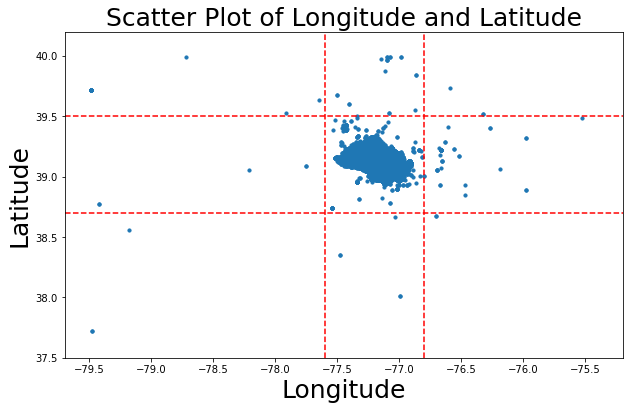

In [10]:
# Extract the Longitude and Latitude columns from the DataFrame
longitude = df['Longitude']
latitude = df['Latitude']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, s=10)  # Adjust the 's' parameter to change the size of the markers

plt.ylim(37.5, 40.2)
plt.xlim(-79.7, -75.2)

plt.axvline(x=-77.6, color='red', linestyle='--')
plt.axvline(x=-76.8, color='red', linestyle='--')
plt.axhline(y=38.7, color='red', linestyle='--')
plt.axhline(y=39.5, color='red', linestyle='--')


# Customize the plot
plt.xlabel('Longitude', fontsize=25)
plt.ylabel('Latitude', fontsize=25)
plt.title('Scatter Plot of Longitude and Latitude', fontsize=25)

# Show the plot
plt.show()


 #### נשאיר רק את הנקודות שנמצאות בטווח שנראה בגרף 

In [11]:
# Filter the DataFrame to keep rows with 'Longitude' within the desired range
df = df[(df['Longitude'] >= -77.6) & (df['Longitude'] <= -76.8)]
df = df[(df['Latitude'] >= 38.7) & (df['Latitude'] <= 39.5)]


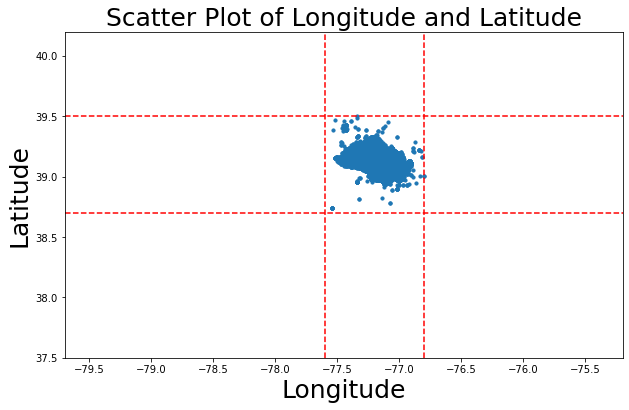

In [12]:
# Extract the Longitude and Latitude columns from the DataFrame
longitude = df['Longitude']
latitude = df['Latitude']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, s=10)  # Adjust the 's' parameter to change the size of the markers

plt.ylim(37.5, 40.2)
plt.xlim(-79.7, -75.2)

plt.axvline(x=-77.6, color='red', linestyle='--')
plt.axvline(x=-76.8, color='red', linestyle='--')
plt.axhline(y=38.7, color='red', linestyle='--')
plt.axhline(y=39.5, color='red', linestyle='--')

# Customize the plot
plt.xlabel('Longitude', fontsize=25)
plt.ylabel('Latitude', fontsize=25)
plt.title('Scatter Plot of Longitude and Latitude', fontsize=25)

# Show the plot
plt.show()


## "Unknown" הפונקציה מקבלת מילה ומחליפה כל מופע שלה בדאטה ב

In [13]:
def replace_word_with_unknown(df, word):
    df = df.replace(word, 'Unknown')
    return df

df = replace_word_with_unknown(df, "N/A")
df = replace_word_with_unknown(df, "UNKNOWN")


## הפונקציה מקבלת דאטה ושם עמודה ומחזירה את מספר הערכים הריקים


In [14]:
def count_empty_cells(df, column_name):
    empty_cells_count = df[column_name].isnull().sum()
    return empty_cells_count

#print(count_empty_cells(df, 'Route Type') )

## "Unknown"הפונקציה  מחליפה את כל הערכים הריקים ב" 

In [15]:
def replace_empty_values(df):
    df = df.fillna('Unknown')
    return df

df = replace_empty_values(df)

## הפונקציה מוחקת את כל העמודות שיש בהן מעל 15% ערכים לא ידועים


In [16]:
def delete_columns_with_unknown(df, Percent=0.15):
    unknown_counts = df.isin(['Unknown']).sum()  # Count the 'Unknown' values in each column
    columns_to_delete = unknown_counts[unknown_counts > (Percent * len(df))].index
    df = df.drop(columns=columns_to_delete)  # Delete the columns
    return df, list(columns_to_delete)

df, deleted_columns = delete_columns_with_unknown(df, Percent=0.15)
print("Deleted columns:", deleted_columns)
print("Number of columns:", df.shape[1])

Deleted columns: ['Cross-Street Type', 'Municipality', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Circumstance', 'Driver Distracted By', 'Equipment Problems']
Number of columns: 18


## הפונקציה מקבלת דאטה ומוחקת את כל השורות שיש בהם ערכים לא ידועים

In [17]:
def delete_rows_with_unknown(df):
    df = df[~df.isin(['Unknown']).any(axis=1)]
    return df

df = delete_rows_with_unknown(df)

### סופר את מספר הפעמים ש 
### "Unknown"
### מופיע בדאטה 

In [18]:
unknown_count = df["Agency Name"].value_counts().get('Unknown', 0)
print(unknown_count)

0


In [19]:
print(df.shape[0])

118567


In [20]:
## נמחוק את העמודה כי יש בה רק ערך אחד
df = df.drop("Parked Vehicle", axis=1)
df = df.drop("Driverless Vehicle", axis=1)
df = df.drop("Drivers License State", axis=1)
df

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Driver At Fault,Injury Severity,Vehicle Damage Extent,Speed Limit,Vehicle Year,Latitude,Longitude
4,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,OTHER,CLEAR,DRY,DAYLIGHT,Yes,NO APPARENT INJURY,DISABLING,25.0,2004.0,39.080062,-77.097845
5,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,OTHER,CLOUDY,DRY,DAYLIGHT,Yes,POSSIBLE INJURY,DISABLING,25.0,2006.0,39.175230,-77.241090
7,Rockville Police Departme,Property Damage Crash,04/21/2020 06:45:00 AM,Municipality,SAME DIR REAR END,CLEAR,DRY,DAWN,No,NO APPARENT INJURY,DESTROYED,40.0,2018.0,39.066925,-77.154085
8,Montgomery County Police,Property Damage Crash,03/24/2020 07:13:00 AM,County,SINGLE VEHICLE,CLOUDY,DRY,DAYLIGHT,No,NO APPARENT INJURY,FUNCTIONAL,35.0,2017.0,39.131327,-77.083237
9,Montgomery County Police,Property Damage Crash,04/16/2020 12:08:00 AM,County,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,No,NO APPARENT INJURY,SUPERFICIAL,35.0,2014.0,39.002137,-77.226225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159002,Montgomery County Police,Property Damage Crash,05/03/2023 06:51,County,STRAIGHT MOVEMENT ANGLE,RAINING,WET,DAYLIGHT,Yes,NO APPARENT INJURY,DISABLING,35.0,2017.0,39.091914,-77.208750
159003,Rockville Police Departme,Property Damage Crash,04/28/2023 08:15:00 PM,Maryland (State),SAME DIR REAR END,RAINING,WET,DARK LIGHTS ON,Yes,NO APPARENT INJURY,DISABLING,35.0,2006.0,39.077130,-77.124061
159004,Montgomery County Police,Property Damage Crash,04/24/2023 06:05:00 PM,County,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,No,NO APPARENT INJURY,SUPERFICIAL,25.0,2016.0,39.027872,-77.079543
159005,Montgomery County Police,Injury Crash,05/02/2023 13:13,County,SAME DIRECTION LEFT TURN,RAINING,WET,DAYLIGHT,Yes,NO APPARENT INJURY,FUNCTIONAL,35.0,2016.0,39.053585,-77.105313


# test הורדת הקובץ למחשב לפני encoding 

In [21]:
output_path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_test.csv"
df.to_csv(output_path, index=False)

# encoding

## פיצול העמודה של התאריך ל5 עמודות שונות: בוקר/ערב,שעה,יום,חודש,שנה

In [22]:
print(df["Crash Date/Time"].dtype)

#נשנה לסוג תאריך
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

# נבדוק מה סוג העמודה לאחר השינוי
print(df["Crash Date/Time"].dtype)

# Extract day, hour, month, and year into separate columns
df['Year'] = df['Crash Date/Time'].dt.year
#df['Month'] = df['Crash Date/Time'].dt.month
#df['Day'] = df['Crash Date/Time'].dt.day
df['Hour'] = df['Crash Date/Time'].dt.hour
#df['Minute'] = df['Crash Date/Time'].dt.minute
#df['AM/PM'] = df['Crash Date/Time'].dt.strftime('%p')

object
datetime64[ns]


In [23]:
#הדפסת העמודות החדשות 
#print(df[['Year','Month','Day','Hour','AM/PM']])

In [24]:
#מחיקת העמודה הישנה שממנה פיצלנו ל6 עמודות
df.drop("Crash Date/Time", axis=1, inplace=True)
#print(df.head())

## פונקציה שמחליפה את המילה כן ב1 ואת המילה לא ב0

In [25]:
#מדפיס ערכים יחודיים בעמודה
print(df['Driver At Fault'].unique())

['Yes' 'No']


In [26]:
#function- replaces the values "yes" with 1 and "no" with 0
def replace_values(df, column_name):
    df[column_name] = df[column_name].replace({'Yes': 1, 'No': 0})
    return df
#print(df['Driver At Fault'].unique()) #מדפיס ערכים יחודיים בעמודה

In [27]:
#ביצענו את פעולת ההחלפה ל-0 ו-1 על 3 העמודות שרשמנו. עמודות אלו הכילו 2 ערכים בלבד של כן ולא.
df= replace_values(df, 'Driver At Fault')
#df= replace_values(df, 'Parked Vehicle')
#df= replace_values(df, 'Driverless Vehicle')
#print(df['Driver At Fault'].unique()) #

In [28]:
#שינוי ל 0 ו 1 בעמודת AM/PM
#df['AM/PM'] = df['AM/PM'].replace({'AM': 1, 'PM': 0})

## שינוי ערכים קטגוריאלים ל 0 ו 1

In [29]:
# ביצענו encoding לכל העמודות הקטגורילאליות.
df = pd.get_dummies(df, columns=['Agency Name', 'ACRS Report Type', 'Route Type', 'Weather', 'Surface Condition'])
df = pd.get_dummies(df, columns=['Light', 'Injury Severity', 'Collision Type', 'Vehicle Damage Extent'])

In [30]:
## נמחוק את העמודה כי יש בה רק ערך אחד
#df = df.drop("Parked Vehicle", axis=1)
#df = df.drop("Driverless Vehicle", axis=1)


## הורדת הקובץ לאחר השינוי למחשב שלי

In [31]:
output_path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_encoding.csv"
df.to_csv(output_path, index=False)

In [32]:
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
4,1,25.0,2004.0,39.080062,-77.097845,2020,15,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,25.0,2006.0,39.175230,-77.241090,2020,9,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,40.0,2018.0,39.066925,-77.154085,2020,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,35.0,2017.0,39.131327,-77.083237,2020,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,0,35.0,2014.0,39.002137,-77.226225,2020,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159002,1,35.0,2017.0,39.091914,-77.208750,2023,6,0,0,0,...,0,0,0,1,0,1,0,0,0,0
159003,1,35.0,2006.0,39.077130,-77.124061,2023,20,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159004,0,25.0,2016.0,39.027872,-77.079543,2023,18,0,0,0,...,0,0,0,0,0,0,0,0,0,1
159005,1,35.0,2016.0,39.053585,-77.105313,2023,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## נורמליזציה לנתונים 

In [33]:
# Normalize the data using the StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data and original column names
df = pd.DataFrame(X_scaled, columns=df.columns)

In [34]:
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
0,1.0,0.357143,0.558140,0.451748,0.613359,0.625,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.357143,0.604651,0.579439,0.417745,0.625,0.391304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.571429,0.883721,0.434122,0.536558,0.625,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.500000,0.860465,0.520532,0.633308,0.625,0.304348,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.500000,0.790698,0.347193,0.438044,0.625,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1.0,0.500000,0.860465,0.467650,0.461908,1.000,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
118563,1.0,0.500000,0.604651,0.447814,0.577559,1.000,0.869565,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118564,0.0,0.357143,0.837209,0.381723,0.638353,1.000,0.782609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
118565,1.0,0.500000,0.837209,0.416223,0.603161,1.000,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## שמות של העמודות בדאטה אחרי הטיפול במשתנים הקטגוריים

In [35]:
column_names = df.columns.tolist()
#print(column_names)
print(len(column_names))

85


## הורדת הקובץ המנורמל למחשב שלי

In [36]:
output_path = "C:/Users/shani/MyNotebooks/project_machine_learning/Crash_Reporting_normalized.csv"
df.to_csv(output_path, index=False)

In [37]:
df

,Driver At Fault,Speed Limit,Vehicle Year,Latitude,Longitude,Year,Hour,Agency Name_GAITHERSBURG,Agency Name_Gaithersburg Police Depar,Agency Name_MCPARK,...,Collision Type_SAME DIRECTION RIGHT TURN,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Vehicle Damage Extent_DESTROYED,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_OTHER,Vehicle Damage Extent_SUPERFICIAL
0,1.0,0.357143,0.558140,0.451748,0.613359,0.625,0.652174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.357143,0.604651,0.579439,0.417745,0.625,0.391304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.571429,0.883721,0.434122,0.536558,0.625,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.500000,0.860465,0.520532,0.633308,0.625,0.304348,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.500000,0.790698,0.347193,0.438044,0.625,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118562,1.0,0.500000,0.860465,0.467650,0.461908,1.000,0.260870,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
118563,1.0,0.500000,0.604651,0.447814,0.577559,1.000,0.869565,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118564,0.0,0.357143,0.837209,0.381723,0.638353,1.000,0.782609,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
118565,1.0,0.500000,0.837209,0.416223,0.603161,1.000,0.565217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
